In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('../nyc_data.csv')
data.head()

,project_id,project_name,program_group,project_start_date,project_completion_date,extended_affordability_status,prevailing_wage_status,extremely_low_income_units,very_low_income,low_income_units,moderate_income,middle_income,other,counted_rental_units,counted_homeownership_units,all_counted_units,total_units,senior_units,planned_tax_benefit
0,60912,CONFIDENTIAL,Confidential,2016-04-29T00:00:00.000,2016-04-29T00:00:00.000,No,Non Prevailing Wage,0,0,1,0,0,0,0,1,1,1,0,NaN
1,60914,CONFIDENTIAL,Confidential,2016-04-18T00:00:00.000,2016-04-18T00:00:00.000,No,Non Prevailing Wage,0,0,1,0,0,0,0,1,1,1,0,NaN
2,60917,CONFIDENTIAL,Confidential,2016-04-19T00:00:00.000,2016-04-19T00:00:00.000,No,Non Prevailing Wage,0,0,1,0,0,0,0,1,1,1,0,NaN
3,60919,CONFIDENTIAL,Confidential,2016-04-26T00:00:00.000,2016-04-26T00:00:00.000,No,Non Prevailing Wage,0,0,1,0,0,0,0,1,1,1,0,NaN
4,60963,FAC. 6309 FOURTH AVENUE,Multifamily Finance Program,2019-11-26T00:00:00.000,2023-04-18T00:00:00.000,No,Prevailing Wage,83,0,0,0,0,1,84,0,84,84,83,420c


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3634 entries, 0 to 3633
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   project_id                     3634 non-null   int64 
 1   project_name                   3634 non-null   object
 2   program_group                  3634 non-null   object
 3   project_start_date             3634 non-null   object
 4   project_completion_date        2660 non-null   object
 5   extended_affordability_status  3634 non-null   object
 6   prevailing_wage_status         3634 non-null   object
 7   extremely_low_income_units     3634 non-null   int64 
 8   very_low_income                3634 non-null   int64 
 9   low_income_units               3634 non-null   int64 
 10  moderate_income                3634 non-null   int64 
 11  middle_income                  3634 non-null   int64 
 12  other                          3634 non-null   int64 
 13  cou

In [38]:
# We will convert date columns to datetime format and calculate the project duration
data['project_start_date'] = pd.to_datetime(data['project_start_date'])
data['project_completion_date'] = pd.to_datetime(data['project_completion_date'])
data['project_duration'] = (data['project_completion_date'] - data['project_start_date']).dt.days

In [ ]:
#Provide overview of the data that we have in terms of structure and the content
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3634 entries, 0 to 3633
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   project_id                     3634 non-null   int64         
 1   project_name                   3634 non-null   object        
 2   program_group                  3634 non-null   object        
 3   project_start_date             3634 non-null   datetime64[ns]
 4   project_completion_date        2660 non-null   datetime64[ns]
 5   extended_affordability_status  3634 non-null   object        
 6   prevailing_wage_status         3634 non-null   object        
 7   extremely_low_income_units     3634 non-null   int64         
 8   very_low_income                3634 non-null   int64         
 9   low_income_units               3634 non-null   int64         
 10  moderate_income                3634 non-null   int64         
 11  middle_income    

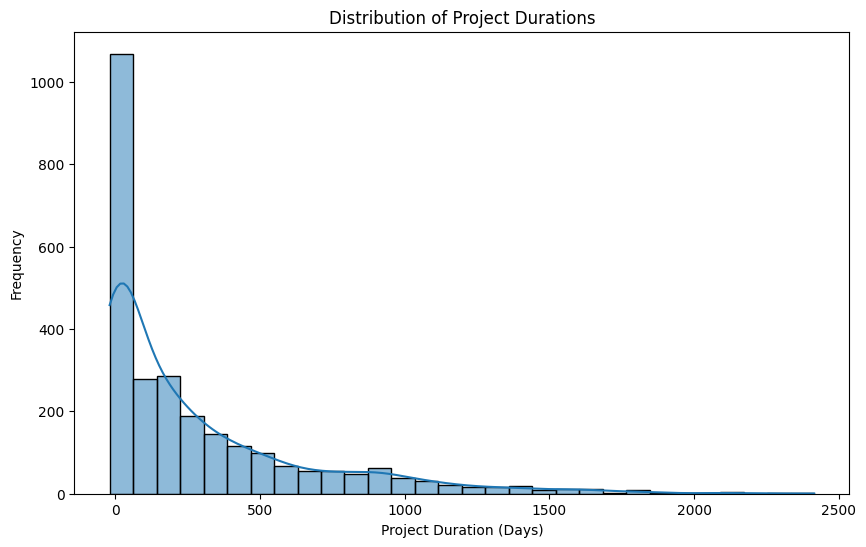

In [ ]:
# Looking at the distribution of the overall project durations in terms of frequency and the project duration in days
plt.figure(figsize=(10, 6))
sns.histplot(data['project_duration'], bins=30, kde=True)
plt.title('Distribution of Project Durations')
plt.xlabel('Project Duration (Days)')
plt.ylabel('Frequency')
plt.show()

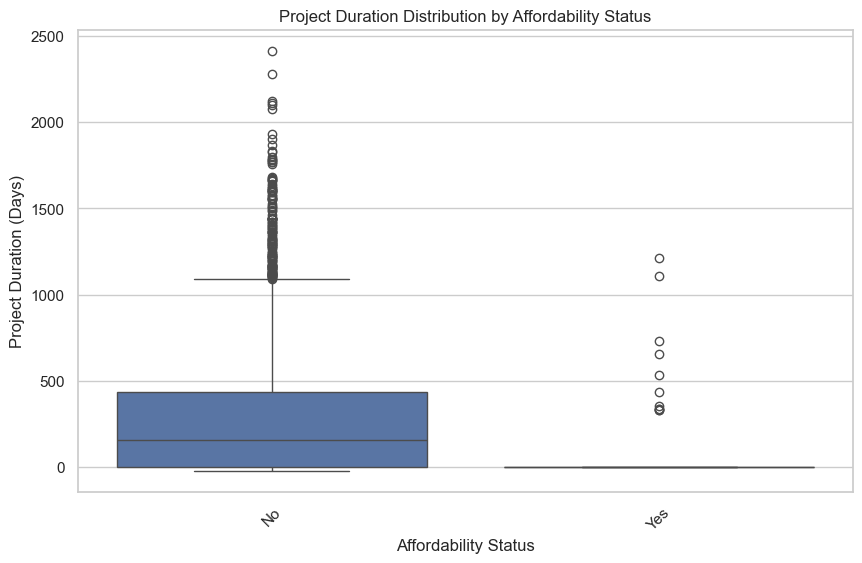

In [ ]:
# Box plot for project duration by their affordability status
plt.figure(figsize=(10, 6))
sns.boxplot(x='extended_affordability_status', y='project_duration', data=data)
plt.title('Project Duration Distribution by Affordability Status')
plt.xlabel('Affordability Status')
plt.ylabel('Project Duration (Days)')
plt.xticks(rotation=45)
plt.show()

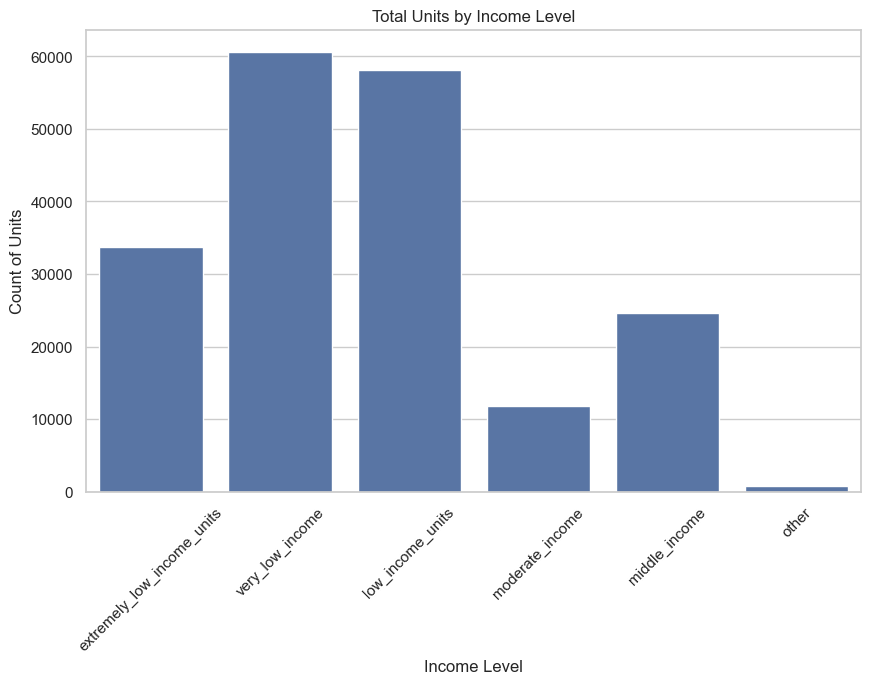

In [ ]:
# Looking at the total units by their income level
income_columns = ['extremely_low_income_units', 'very_low_income', 'low_income_units', 'moderate_income', 'middle_income', 'other']
income_data = data[income_columns].sum().reset_index()
income_data.columns = ['Income Level', 'Count']
plt.figure(figsize=(10, 6))
sns.barplot(x='Income Level', y='Count', data=income_data)
plt.title('Total Units by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Count of Units')
plt.xticks(rotation=45)
plt.show()


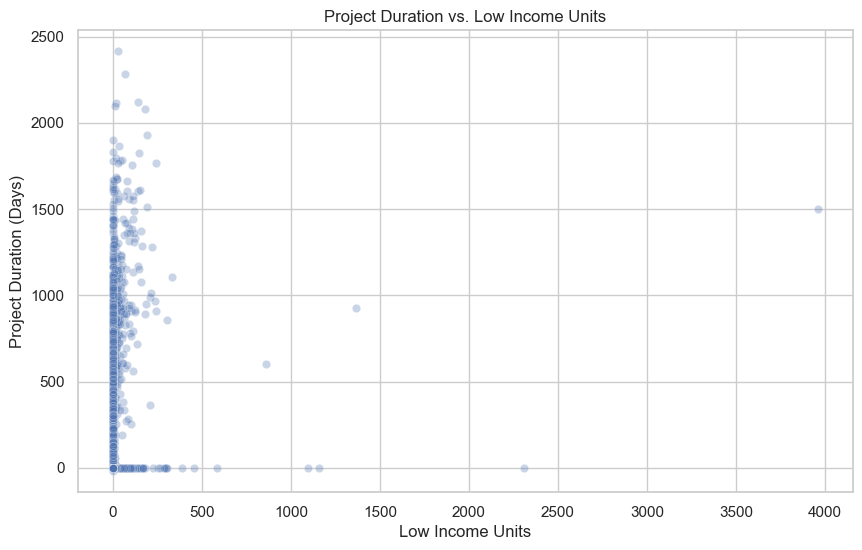

In [ ]:
# Scatter plot for the project duration vs. the amount of low income units
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='low_income_units', y='project_duration', alpha=0.3)
plt.title('Project Duration vs. Low Income Units')
plt.xlabel('Low Income Units')
plt.ylabel('Project Duration (Days)')
plt.show()

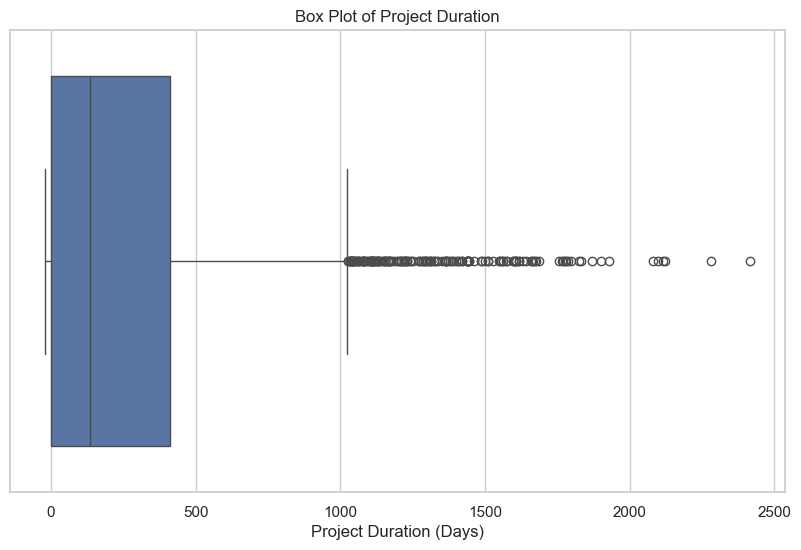

In [ ]:
# Here we can check for outliers in the project duration
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['project_duration'])
plt.title('Box Plot of Project Duration')
plt.xlabel('Project Duration (Days)')
plt.show()

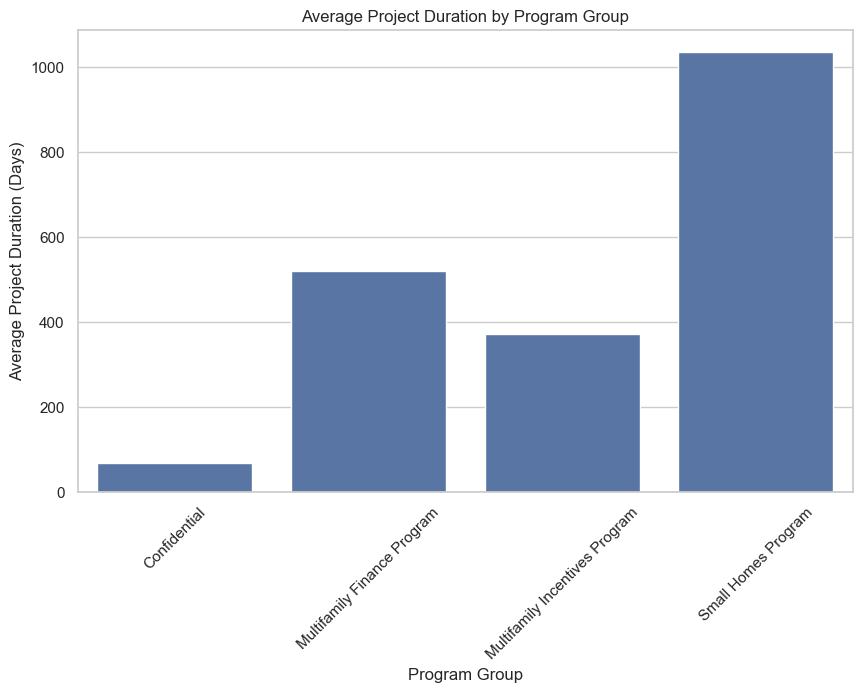

In [73]:
# Analyze the average project duration by the program group
program_group_duration = data.groupby('program_group')['project_duration'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='program_group', y='project_duration', data=program_group_duration)
plt.title('Average Project Duration by Program Group')
plt.xlabel('Program Group')
plt.ylabel('Average Project Duration (Days)')
plt.xticks(rotation=45)
plt.show()